In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from scipy import stats
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier

In [2]:
from pandas import read_csv

In [3]:
df = read_csv('2006-2007-school-progress-report-1.csv')

In [4]:
df.info()
#null_columns=df.columns[df.isnull().any()]

#df[null_columns].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 14 columns):
DBN                                    1262 non-null object
DISTRICT                               1262 non-null int64
SCHOOL                                 1262 non-null object
SCHOOL SUPPORT ORGANIZATION/NETWORK    1262 non-null object
PROGRESS REPORT TYPE                   1262 non-null object
SCHOOL LEVEL*                          1262 non-null object
PEER INDEX                             1262 non-null object
GRADE                                  1262 non-null object
OVERALL SCORE                          1262 non-null object
ENVIRONMENT CATEGORY SCORE             1262 non-null object
PERFORMANCE CATEGORY SCORE             1262 non-null object
PROGRESS CATEGORY SCORE                1262 non-null object
ADDITIONAL CREDIT                      1262 non-null object
QUALITY REVIEW SCORE                   1247 non-null object
dtypes: int64(1), object(13)
memory usage: 138.1+ KB


In [5]:
df.describe()

,DISTRICT
count,1262.000000
mean,17.292393
std,13.383892
min,1.000000
25%,8.000000
50%,15.000000
75%,25.000000
max,84.000000


In [6]:
df['PEER INDEX'] = pd.to_numeric(df['PEER INDEX' ],errors='coerce')
df['OVERALL SCORE'] =pd.to_numeric(df['OVERALL SCORE'],errors='coerce')
df['ENVIRONMENT CATEGORY SCORE'] = pd.to_numeric(df['ENVIRONMENT CATEGORY SCORE'],errors='coerce')
df['PERFORMANCE CATEGORY SCORE'] = pd.to_numeric(df['PERFORMANCE CATEGORY SCORE'],errors='coerce')
df['PROGRESS CATEGORY SCORE'] = pd.to_numeric(df['PROGRESS CATEGORY SCORE'],errors='coerce')
df['ADDITIONAL CREDIT'] = pd.to_numeric(df['ADDITIONAL CREDIT'],errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 14 columns):
DBN                                    1262 non-null object
DISTRICT                               1262 non-null int64
SCHOOL                                 1262 non-null object
SCHOOL SUPPORT ORGANIZATION/NETWORK    1262 non-null object
PROGRESS REPORT TYPE                   1262 non-null object
SCHOOL LEVEL*                          1262 non-null object
PEER INDEX                             1239 non-null float64
GRADE                                  1262 non-null object
OVERALL SCORE                          1261 non-null float64
ENVIRONMENT CATEGORY SCORE             1261 non-null float64
PERFORMANCE CATEGORY SCORE             1261 non-null float64
PROGRESS CATEGORY SCORE                1261 non-null float64
ADDITIONAL CREDIT                      1261 non-null float64
QUALITY REVIEW SCORE                   1247 non-null object
dtypes: float64(6), int64(1), object(7)
memory u

In [8]:
df.isnull().sum()

DBN                                     0
DISTRICT                                0
SCHOOL                                  0
SCHOOL SUPPORT ORGANIZATION/NETWORK     0
PROGRESS REPORT TYPE                    0
SCHOOL LEVEL*                           0
PEER INDEX                             23
GRADE                                   0
OVERALL SCORE                           1
ENVIRONMENT CATEGORY SCORE              1
PERFORMANCE CATEGORY SCORE              1
PROGRESS CATEGORY SCORE                 1
ADDITIONAL CREDIT                       1
QUALITY REVIEW SCORE                   15
dtype: int64

In [9]:
df['DISTRICT'] =pd.to_numeric(df['DISTRICT'],errors='coerce')


In [10]:
df['PEER INDEX']=df['PEER INDEX'].fillna(df['PEER INDEX'].mean())
df['OVERALL SCORE']=df['OVERALL SCORE'].fillna(df['OVERALL SCORE'].mean())
df['ENVIRONMENT CATEGORY SCORE']=df['ENVIRONMENT CATEGORY SCORE'].fillna(df['ENVIRONMENT CATEGORY SCORE'].mean())
df['PERFORMANCE CATEGORY SCORE']=df['PERFORMANCE CATEGORY SCORE'].fillna(df['PERFORMANCE CATEGORY SCORE'].mean())
df['PROGRESS CATEGORY SCORE']=df['PROGRESS CATEGORY SCORE'].fillna(df['PROGRESS CATEGORY SCORE'].mean())
df['ADDITIONAL CREDIT']=df['ADDITIONAL CREDIT'].fillna(df['ADDITIONAL CREDIT'].mean())

In [11]:
df['QUALITY REVIEW SCORE'] = df['QUALITY REVIEW SCORE'].fillna(df['QUALITY REVIEW SCORE'].value_counts().index[0])
df.isnull().sum()

DBN                                    0
DISTRICT                               0
SCHOOL                                 0
SCHOOL SUPPORT ORGANIZATION/NETWORK    0
PROGRESS REPORT TYPE                   0
SCHOOL LEVEL*                          0
PEER INDEX                             0
GRADE                                  0
OVERALL SCORE                          0
ENVIRONMENT CATEGORY SCORE             0
PERFORMANCE CATEGORY SCORE             0
PROGRESS CATEGORY SCORE                0
ADDITIONAL CREDIT                      0
QUALITY REVIEW SCORE                   0
dtype: int64

In [12]:
df['SCHOOL'] = df['SCHOOL'].fillna(df['SCHOOL'].value_counts().index[0])


In [13]:
df.describe()

,DISTRICT,PEER INDEX,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,17.292393,34.928313,54.078824,0.501137,0.552590,0.501964,2.373513
std,13.383892,31.410518,14.650773,0.189161,0.187635,0.182851,2.556840
min,1.000000,1.720000,-0.447000,-0.141000,-0.109000,-0.263000,0.000000
25%,8.000000,3.030000,44.100000,0.362000,0.426000,0.385250,0.000000
50%,15.000000,32.445000,54.040000,0.497000,0.552000,0.505500,1.500000
75%,25.000000,69.195000,63.295000,0.634750,0.675000,0.617750,3.750000
max,84.000000,85.510000,117.420000,1.133000,1.135000,1.281000,12.000000


In [14]:
df2 = df

df2["SCHOOL SUPPORT ORGANIZATION/NETWORK"] = df2["SCHOOL SUPPORT ORGANIZATION/NETWORK"].astype('category')
df2["PROGRESS REPORT TYPE"] = df2["PROGRESS REPORT TYPE"].astype('category')
df2["SCHOOL LEVEL*"] = df2["SCHOOL LEVEL*"].astype('category')
df2["GRADE"] = df2["GRADE"].astype('category')
df2["SCHOOL"] = df2["SCHOOL"].astype('category')
df2["QUALITY REVIEW SCORE"] = df2["QUALITY REVIEW SCORE"].astype('category')

df2["SCHOOL SUPPORT ORGANIZATION/NETWORK"] = df2["SCHOOL SUPPORT ORGANIZATION/NETWORK"].cat.codes
df2["PROGRESS REPORT TYPE"] = df2["PROGRESS REPORT TYPE"].cat.codes
df2["SCHOOL LEVEL*"] = df2["SCHOOL LEVEL*"].cat.codes
df2["GRADE"] = df2["GRADE"].cat.codes
df2["SCHOOL"] = df2["SCHOOL"].cat.codes
df2["QUALITY REVIEW SCORE"] = df2["QUALITY REVIEW SCORE"].cat.codes
df = df2
newdata = df2

In [15]:
df3 = df2
df2.describe()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,17.292393,609.159271,35.809826,0.206815,1.153724,34.928313,1.318542,54.078824,0.501137,0.552590,0.501964,2.373513,0.785261
std,13.383892,358.175902,21.208462,0.405182,1.278188,31.410518,1.050639,14.650773,0.189161,0.187635,0.182851,2.556840,0.937714
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.720000,0.000000,-0.447000,-0.141000,-0.109000,-0.263000,0.000000,0.000000
25%,8.000000,298.250000,18.000000,0.000000,0.000000,3.030000,1.000000,44.100000,0.362000,0.426000,0.385250,0.000000,0.000000
50%,15.000000,606.500000,35.000000,0.000000,1.000000,32.445000,1.000000,54.040000,0.497000,0.552000,0.505500,1.500000,0.000000
75%,25.000000,921.750000,53.000000,0.000000,3.000000,69.195000,2.000000,63.295000,0.634750,0.675000,0.617750,3.750000,2.000000
max,84.000000,1223.000000,73.000000,1.000000,4.000000,85.510000,5.000000,117.420000,1.133000,1.135000,1.281000,12.000000,2.000000


In [16]:
#from sklearn.preprocessing import MinMaxScaler

In [17]:
#normalisation
#dfn=df2
#dfn = dfn.drop('QUALITY REVIEW SCORE',1)
#dfn = dfn.drop('DBN',1)
#dfn = dfn.drop('DISTRICT',1)
#dfn = dfn.drop('SCHOOL',1)

In [18]:
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(dfn) 
#dfn.loc[:,:] = scaled_values

In [19]:
#dfn.head()

In [16]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

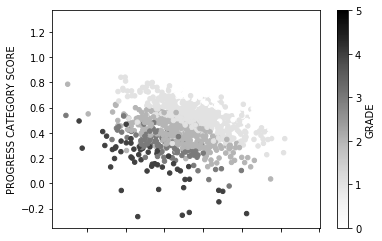

In [17]:
df2.plot.scatter(x='PERFORMANCE CATEGORY SCORE', y='PROGRESS CATEGORY SCORE', c='GRADE')
plt.show()

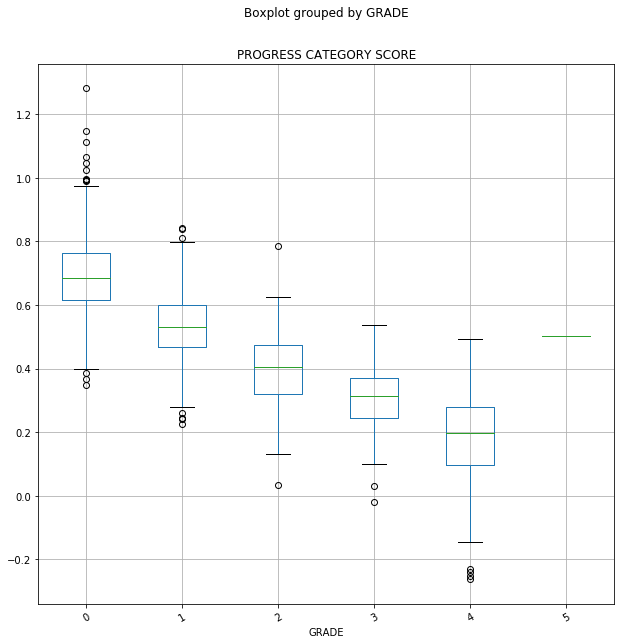

In [18]:
df2.boxplot('PROGRESS CATEGORY SCORE','GRADE',rot = 30,figsize=(10,10))

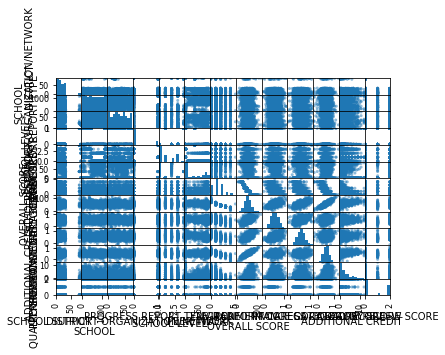

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2)
plt.show()

In [33]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

C:\Users\KRK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


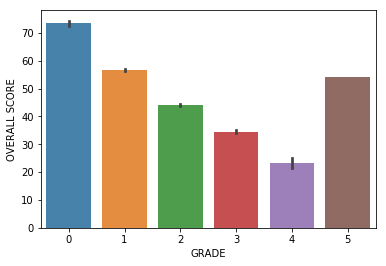

In [34]:
sns.barplot(df2['GRADE'],df2['OVERALL SCORE'], alpha=0.9)

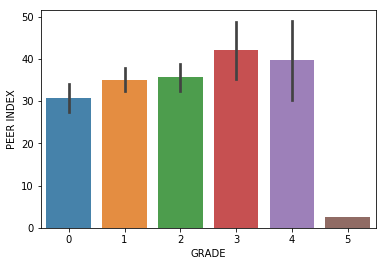

In [35]:
sns.barplot(df2['GRADE'],df2['PEER INDEX'], alpha=0.9)

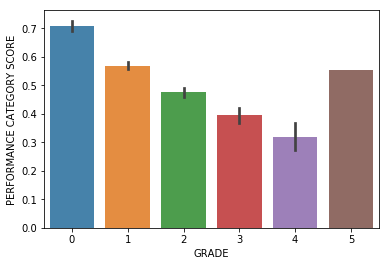

In [36]:
sns.barplot(df2['GRADE'],df2['PERFORMANCE CATEGORY SCORE'], alpha=0.9)

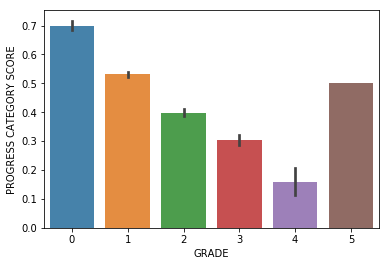

In [37]:
sns.barplot(df2['GRADE'],df2['PROGRESS CATEGORY SCORE'], alpha=0.9)

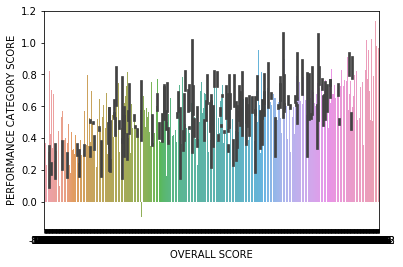

In [38]:
sns.barplot(df2['OVERALL SCORE'],df2['PERFORMANCE CATEGORY SCORE'], alpha=0.9)

In [21]:
df2.describe()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,17.292393,609.159271,35.809826,0.206815,1.153724,34.928313,1.318542,54.078824,0.501137,0.552590,0.501964,2.373513,0.785261
std,13.383892,358.175902,21.208462,0.405182,1.278188,31.410518,1.050639,14.650773,0.189161,0.187635,0.182851,2.556840,0.937714
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.720000,0.000000,-0.447000,-0.141000,-0.109000,-0.263000,0.000000,0.000000
25%,8.000000,298.250000,18.000000,0.000000,0.000000,3.030000,1.000000,44.100000,0.362000,0.426000,0.385250,0.000000,0.000000
50%,15.000000,606.500000,35.000000,0.000000,1.000000,32.445000,1.000000,54.040000,0.497000,0.552000,0.505500,1.500000,0.000000
75%,25.000000,921.750000,53.000000,0.000000,3.000000,69.195000,2.000000,63.295000,0.634750,0.675000,0.617750,3.750000,2.000000
max,84.000000,1223.000000,73.000000,1.000000,4.000000,85.510000,5.000000,117.420000,1.133000,1.135000,1.281000,12.000000,2.000000


In [16]:
df2.isnull().sum()

DBN                                    0
DISTRICT                               0
SCHOOL                                 0
SCHOOL SUPPORT ORGANIZATION/NETWORK    0
PROGRESS REPORT TYPE                   0
SCHOOL LEVEL*                          0
PEER INDEX                             0
GRADE                                  0
OVERALL SCORE                          0
ENVIRONMENT CATEGORY SCORE             0
PERFORMANCE CATEGORY SCORE             0
PROGRESS CATEGORY SCORE                0
ADDITIONAL CREDIT                      0
QUALITY REVIEW SCORE                   0
dtype: int64

In [20]:
import sklearn.metrics as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
df2 = df2.drop('DBN',1)
df3 = df2
#df2 = df2.drop('SCHOOL',1)

In [23]:
Y = df2['QUALITY REVIEW SCORE']

In [24]:
df2 = df2.drop('QUALITY REVIEW SCORE',1)

In [25]:
df2.isnull().sum()

DISTRICT                               0
SCHOOL                                 0
SCHOOL SUPPORT ORGANIZATION/NETWORK    0
PROGRESS REPORT TYPE                   0
SCHOOL LEVEL*                          0
PEER INDEX                             0
GRADE                                  0
OVERALL SCORE                          0
ENVIRONMENT CATEGORY SCORE             0
PERFORMANCE CATEGORY SCORE             0
PROGRESS CATEGORY SCORE                0
ADDITIONAL CREDIT                      0
dtype: int64

In [26]:
from sklearn import preprocessing

In [27]:
normalized_df2 = preprocessing.normalize(df2)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df2, Y, test_size=0.2, random_state=0)

In [32]:
clf = RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10)

In [33]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1000,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [34]:
p= clf.predict(X_test)

In [44]:
sk.confusion_matrix(y_test,p)

array([[115,   3,  26],
       [ 17,   2,   3],
       [ 54,   0,  33]], dtype=int64)

In [45]:
accuracy_score(y_test,p)*100

59.28853754940712

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
clf2 = MLPClassifier(solver='sgd', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0)

In [48]:
clf2.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-07, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
p2= clf2.predict(X_test)

In [50]:
sk.confusion_matrix(y_test,p2)

array([[144,   0,   0],
       [ 22,   0,   0],
       [ 87,   0,   0]], dtype=int64)

In [51]:
accuracy_score(y_test,p2)*100

56.916996047430835

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf3 = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [54]:
clf3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
p3= clf3.predict(X_test)

In [56]:
sk.confusion_matrix(y_test,p3)

array([[144,   0,   0],
       [ 22,   0,   0],
       [ 87,   0,   0]], dtype=int64)

In [57]:
accuracy_score(y_test,p3)*100

56.916996047430835

In [58]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [59]:
y_pred = classifier.predict(X_test)  

In [60]:
sk.confusion_matrix(y_test,y_pred)

array([[107,   1,  36],
       [ 17,   0,   5],
       [ 54,   1,  32]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)*100

54.9407114624506

In [62]:
df.shape

(1262, 14)

In [63]:
df.describe()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,17.292393,609.159271,35.809826,0.206815,1.153724,34.928313,1.318542,54.078824,0.501137,0.552590,0.501964,2.373513,0.785261
std,13.383892,358.175902,21.208462,0.405182,1.278188,31.410518,1.050639,14.650773,0.189161,0.187635,0.182851,2.556840,0.937714
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.720000,0.000000,-0.447000,-0.141000,-0.109000,-0.263000,0.000000,0.000000
25%,8.000000,298.250000,18.000000,0.000000,0.000000,3.030000,1.000000,44.100000,0.362000,0.426000,0.385250,0.000000,0.000000
50%,15.000000,606.500000,35.000000,0.000000,1.000000,32.445000,1.000000,54.040000,0.497000,0.552000,0.505500,1.500000,0.000000
75%,25.000000,921.750000,53.000000,0.000000,3.000000,69.195000,2.000000,63.295000,0.634750,0.675000,0.617750,3.750000,2.000000
max,84.000000,1223.000000,73.000000,1.000000,4.000000,85.510000,5.000000,117.420000,1.133000,1.135000,1.281000,12.000000,2.000000


In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(clf,normalized_df2,Y, cv=10)

In [66]:
scores2 = cross_val_score(clf2,normalized_df2,Y, cv=10)

In [67]:
scores3 = cross_val_score(clf3,normalized_df2,Y, cv=10)

In [68]:
scores4 = cross_val_score(classifier,normalized_df2,Y, cv=10)

In [69]:
scores

array([0.58267717, 0.62204724, 0.62204724, 0.53543307, 0.57480315,
       0.6031746 , 0.6031746 , 0.52380952, 0.56      , 0.59677419])

In [70]:
scores2

array([0.56692913, 0.56692913, 0.56692913, 0.56692913, 0.56692913,
       0.57142857, 0.57142857, 0.57142857, 0.576     , 0.57258065])

In [71]:
scores3

array([0.56692913, 0.56692913, 0.56692913, 0.56692913, 0.56692913,
       0.57142857, 0.57142857, 0.57142857, 0.576     , 0.57258065])

In [72]:
scores4

array([0.54330709, 0.57480315, 0.59055118, 0.54330709, 0.61417323,
       0.58730159, 0.5       , 0.57142857, 0.552     , 0.58870968])

In [73]:
y_all = newdata['QUALITY REVIEW SCORE']

In [74]:
X_all = newdata.drop('QUALITY REVIEW SCORE',1)

In [31]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.568173 (0.105922)


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.574491 (0.102539)
KNN: 0.568160 (0.037900)
CART: 0.519779 (0.025414)
NB: 0.372341 (0.103604)
SVM: 0.569760 (0.107493)
RF: 0.584027 (0.049523)
MLP: 0.569760 (0.107493)


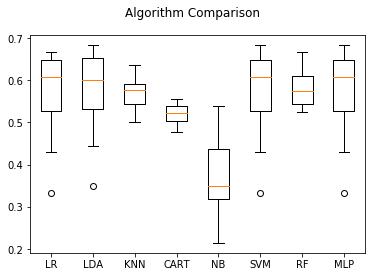

In [76]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial',solver='newton-cg')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10) ))
models.append(('MLP',MLPClassifier(solver='sgd', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, normalized_df2, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
df3.to_csv("test.csv")

In [78]:
import csv
import random
import math
import operator
 
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        dataset = dataset[1:]
        for x in range(len(dataset)):
            for y in range(13):         # 0 to 7 , the numeric values only
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
 
 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))     # Sort distances in ascending order
    neighbors = []
    for x in range(k):                             # k nearest neighbors
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

trainingSet=[]
testSet=[]
split = 0.67
loadDataset('test.csv', split, trainingSet, testSet)
print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 843
Test set: 419
Accuracy: 54.41527446300716%


In [79]:
MLA = [
    #Ensemble Methods
    RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10),    
    #GLM
    LogisticRegression(multi_class='multinomial',solver='newton-cg'),
    MLPClassifier(solver='sgd', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis()
   #tree.ExtraTreeClassifier(),
    
    ]

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [81]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'f1-Score'] = f1_score(y_test, predicted,average='micro')
    MLA_compare.loc[row_index, 'recall'] = recall_score(y_test, predicted,average='micro')
    MLA_compare.loc[row_index, 'precision_score'] = precision_score(y_test, predicted,average='micro')
    row_index = row_index+1

In [82]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,f1-Score,recall,precision_score
0,RandomForestClassifier,0.9713,0.5929,0.592885,0.592885,0.592885
1,LogisticRegression,0.5679,0.5692,0.569170,0.569170,0.569170
2,MLPClassifier,0.5699,0.5692,0.569170,0.569170,0.569170
5,SVC,0.5699,0.5692,0.569170,0.569170,0.569170
7,LinearDiscriminantAnalysis,0.5956,0.5375,0.537549,0.537549,0.537549
4,KNeighborsClassifier,0.7225,0.5178,0.517787,0.517787,0.517787
6,DecisionTreeClassifier,1.0000,0.4901,0.490119,0.490119,0.490119
3,GaussianNB,0.3994,0.3715,0.371542,0.371542,0.371542


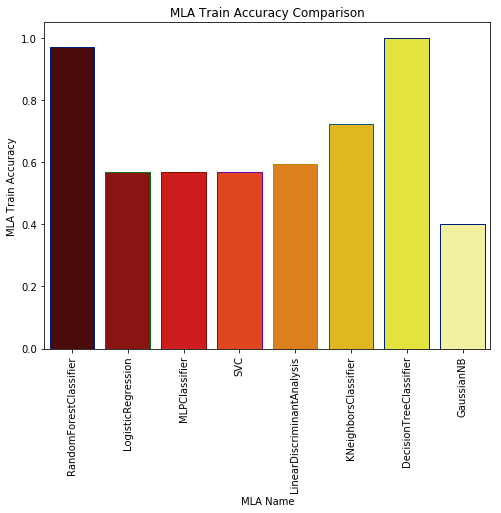

In [83]:

plt.subplots(figsize=(8,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()


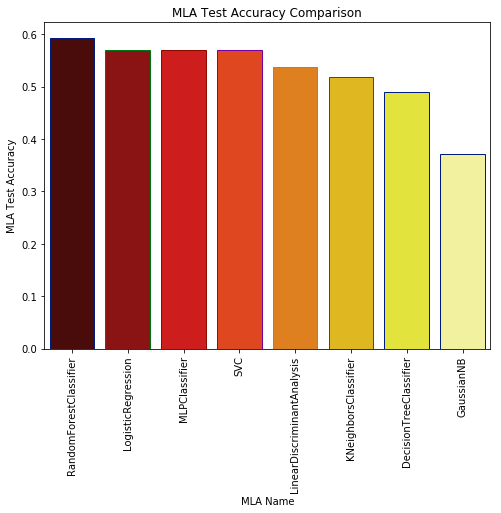

In [84]:
plt.subplots(figsize=(8,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

In [27]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(.95)

In [87]:
lower_dimensional_data = pca.fit_transform(df2)

In [88]:
pca.n_components_

1

In [89]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [90]:
approximation.resize((20,20),refcheck=False)

In [91]:
data1 = df2.values.copy()


In [92]:
data1.resize((20,20),refcheck=False)

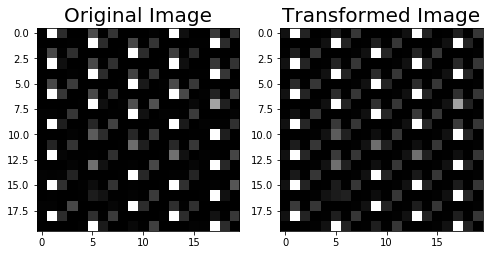

In [93]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(data1,cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation,cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
plt.title('Transformed Image', fontsize = 20);


In [20]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)

In [95]:
principalComponents = pca1.fit_transform(df2)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [96]:
finalDf = pd.concat([principalDf, df[['QUALITY REVIEW SCORE']]], axis = 1)

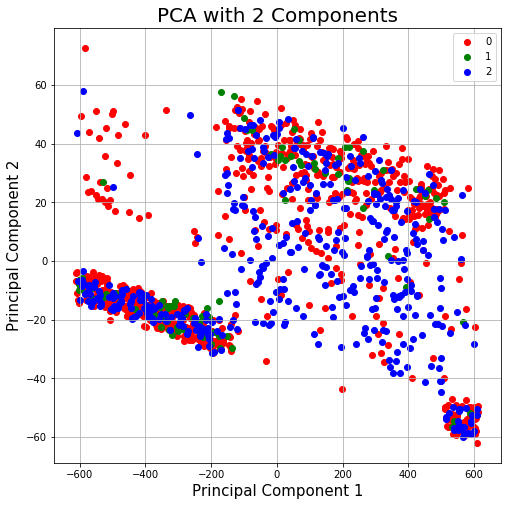

In [97]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with 2 Components', fontsize = 20)

targets = [0, 1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['QUALITY REVIEW SCORE'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [98]:
import seaborn as sns

In [99]:
i = 1
MLA_columns = []
row_index = 0
MLA_compare = pd.DataFrame(columns = MLA_columns)
while i < (df.shape[1]-1):
    pca1 = PCA(n_components = i)
    i = i+1
    principalComponents = pca1.fit_transform(df2)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.2, random_state=0)
    for alg in MLA:
        predicted = alg.fit(X_train, y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index,'MLA Components'] = pca1.n_components_
        MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
        MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
        MLA_compare.loc[row_index, 'f1-Score'] = f1_score(y_test, predicted,average='micro')
        MLA_compare.loc[row_index, 'recall'] = recall_score(y_test, predicted,average='micro')
        MLA_compare.loc[row_index, 'precision_score'] = precision_score(y_test, predicted,average='micro')
        row_index = row_index+1

In [100]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Components,MLA Train Accuracy,MLA Test Accuracy,f1-Score,recall,precision_score
73,LogisticRegression,10.0,0.6640,0.6443,0.644269,0.644269,0.644269
79,LinearDiscriminantAnalysis,10.0,0.6690,0.6403,0.640316,0.640316,0.640316
89,LogisticRegression,12.0,0.6670,0.6364,0.636364,0.636364,0.636364
81,LogisticRegression,11.0,0.6670,0.6364,0.636364,0.636364,0.636364
87,LinearDiscriminantAnalysis,11.0,0.6769,0.6364,0.636364,0.636364,0.636364
95,LinearDiscriminantAnalysis,12.0,0.6759,0.6324,0.632411,0.632411,0.632411
88,RandomForestClassifier,12.0,0.9752,0.6285,0.628458,0.628458,0.628458
91,GaussianNB,12.0,0.6432,0.6285,0.628458,0.628458,0.628458
83,GaussianNB,11.0,0.6442,0.6285,0.628458,0.628458,0.628458
80,RandomForestClassifier,11.0,0.9782,0.6206,0.620553,0.620553,0.620553


In [28]:
import matplotlib.pyplot as plt

LR: 0.569760 (0.107493) [1.000000]
LDA: 0.569760 (0.107493) [1.000000]
KNN: 0.517485 (0.074613) [1.000000]
CART: 0.451681 (0.061092) [1.000000]
NB: 0.569760 (0.107493) [1.000000]


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.525422 (0.072556) [1.000000]
RF: 0.454874 (0.060197) [1.000000]
MLP: 0.539651 (0.084051) [1.000000]
LR: 0.537233 (0.087674) [2.000000]
LDA: 0.537233 (0.087674) [2.000000]
KNN: 0.581584 (0.042509) [2.000000]
CART: 0.504043 (0.056533) [2.000000]
NB: 0.569760 (0.107493) [2.000000]


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.565004 (0.098974) [2.000000]
RF: 0.530152 (0.027625) [2.000000]
MLP: 0.561874 (0.087652) [2.000000]
LR: 0.538820 (0.091236) [3.000000]
LDA: 0.537239 (0.088006) [3.000000]
KNN: 0.555487 (0.030915) [3.000000]
CART: 0.506349 (0.047802) [3.000000]
NB: 0.575309 (0.109760) [3.000000]


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.566585 (0.107162) [3.000000]
RF: 0.553850 (0.032362) [3.000000]
MLP: 0.544432 (0.087409) [3.000000]
LR: 0.552287 (0.082006) [4.000000]
LDA: 0.550700 (0.078713) [4.000000]
KNN: 0.551519 (0.045997) [4.000000]
CART: 0.514373 (0.074370) [4.000000]
NB: 0.585571 (0.083166) [4.000000]


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.567379 (0.107635) [4.000000]
RF: 0.562611 (0.036680) [4.000000]
MLP: 0.540382 (0.071232) [4.000000]
LR: 0.531646 (0.102608) [5.000000]
LDA: 0.533227 (0.099948) [5.000000]
KNN: 0.548350 (0.038683) [5.000000]
CART: 0.504012 (0.076600) [5.000000]


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


NB: 0.555468 (0.057515) [5.000000]
SVM: 0.568966 (0.106861) [5.000000]
RF: 0.561899 (0.068200) [5.000000]
MLP: 0.522135 (0.099285) [5.000000]
LR: 0.541982 (0.103497) [6.000000]
LDA: 0.543576 (0.099326) [6.000000]
KNN: 0.544401 (0.039212) [6.000000]


C:\Users\MyHomePC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


CART: 0.504018 (0.065847) [6.000000]
NB: 0.568135 (0.062030) [6.000000]
SVM: 0.569760 (0.107493) [6.000000]
RF: 0.565786 (0.053630) [6.000000]
MLP: 0.526140 (0.073190) [6.000000]


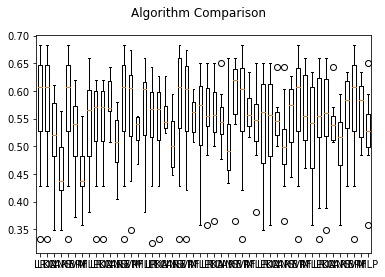

In [102]:
i = 1
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10) ))
models.append(('MLP',MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0)))
results = []
names = []
components = []
scoring = 'accuracy'

while i < 7:
    pca1 = PCA(i)
    i = i+1
    principalComponents = pca1.fit_transform(df2)
    seed = 7
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, principalComponents, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        components.append(pca1.n_components_)
        msg = "%s: %f (%f) [%f]" % (name, cv_results.mean(), cv_results.std(),pca1.n_components_)
        print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [103]:
l = LinearDiscriminantAnalysis()

In [104]:
l.fit(X_train, y_train)  

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [105]:
y_pred = l.predict(X_test)  

In [106]:
scores5 = cross_val_score(l,normalized_df2,Y, cv=10)

In [107]:
scores5

array([0.57480315, 0.61417323, 0.5984252 , 0.5984252 , 0.53543307,
       0.57142857, 0.61111111, 0.61111111, 0.552     , 0.57258065])

In [108]:
Dt = DecisionTreeClassifier()

In [109]:
Dt.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
y_pred = Dt.predict(X_test)  

In [111]:
sk.confusion_matrix(y_test,y_pred)

array([[98, 12, 34],
       [14,  4,  4],
       [41,  3, 43]], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred)*100

57.31225296442688

In [35]:
df3.describe()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,17.292393,609.159271,35.809826,0.206815,1.153724,34.928313,1.318542,54.078824,0.501137,0.552590,0.501964,2.373513,0.785261
std,13.383892,358.175902,21.208462,0.405182,1.278188,31.410518,1.050639,14.650773,0.189161,0.187635,0.182851,2.556840,0.937714
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.720000,0.000000,-0.447000,-0.141000,-0.109000,-0.263000,0.000000,0.000000
25%,8.000000,298.250000,18.000000,0.000000,0.000000,3.030000,1.000000,44.100000,0.362000,0.426000,0.385250,0.000000,0.000000
50%,15.000000,606.500000,35.000000,0.000000,1.000000,32.445000,1.000000,54.040000,0.497000,0.552000,0.505500,1.500000,0.000000
75%,25.000000,921.750000,53.000000,0.000000,3.000000,69.195000,2.000000,63.295000,0.634750,0.675000,0.617750,3.750000,2.000000
max,84.000000,1223.000000,73.000000,1.000000,4.000000,85.510000,5.000000,117.420000,1.133000,1.135000,1.281000,12.000000,2.000000


In [21]:
from sklearn.cluster import KMeans

# CLUSTER THE DATA SEPERATE THE CLUSTERS INTO DIFFERENT DATAFRAMES

In [24]:
dfy = df3['QUALITY REVIEW SCORE']
df4 = df3.drop('QUALITY REVIEW SCORE',axis=1)
km = KMeans(n_clusters=3).fit(df4)

In [25]:
km.labels_

array([0, 0, 0, ..., 1, 1, 2])

In [26]:
#clusters plot

In [27]:
pca = PCA(n_components=2).fit(df4)
pca_d = dfy
pca_c = pca.fit_transform(df4)
#pca_c.head()

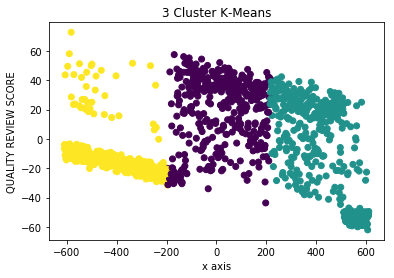

In [28]:
plt.figure('3 Cluster K-Means')
plt.scatter(pca_c[:,0], pca_c[:,1], c=km.labels_)
plt.xlabel('x axis')
plt.ylabel('QUALITY REVIEW SCORE')
plt.title('3 Cluster K-Means')
plt.show()

In [29]:
cluster_map = pd.DataFrame()
newdatamod = pd.DataFrame()
cluster_map['data_index'] = df3.index.values
cluster_map['cluster'] = km.labels_

In [30]:
clus_1_data = df3.iloc[cluster_map[cluster_map['cluster']==1]['data_index']]

In [31]:
clus_0_data = df3.iloc[cluster_map[cluster_map['cluster']==0]['data_index']]

In [32]:
clus_2_data = df3.iloc[cluster_map[cluster_map['cluster']==2]['data_index']]

In [33]:
clus_2_data.shape

(438, 13)

In [34]:
clus_2_data.describe()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,17.787671,204.856164,33.655251,0.424658,2.148402,7.197834,1.310502,54.587059,0.492662,0.566506,0.501703,2.607588,0.680365
std,17.068529,121.149717,21.521685,0.494856,1.081733,13.968239,1.065124,16.004908,0.198707,0.190201,0.181808,2.774417,0.891417
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.720000,0.000000,-0.447000,-0.066000,-0.109000,-0.263000,0.000000,0.000000
25%,7.000000,99.250000,17.000000,0.000000,1.000000,2.682500,1.000000,43.242500,0.340500,0.448500,0.390000,0.000000,0.000000
50%,13.000000,203.500000,32.000000,0.000000,3.000000,3.020000,1.000000,54.200000,0.478000,0.570000,0.504500,1.500000,0.000000
75%,24.000000,310.750000,49.000000,1.000000,3.000000,3.390000,2.000000,64.285000,0.623000,0.676750,0.614000,4.500000,2.000000
max,84.000000,415.000000,73.000000,1.000000,4.000000,79.420000,5.000000,106.630000,1.133000,1.122000,1.148000,12.000000,2.000000


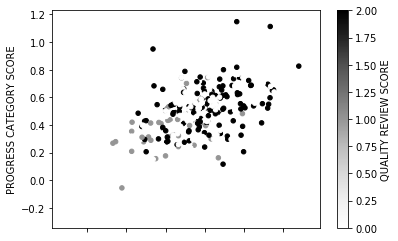

In [35]:
clus_2_data.plot.scatter(x='PERFORMANCE CATEGORY SCORE', y='PROGRESS CATEGORY SCORE', c='QUALITY REVIEW SCORE')
plt.show()

In [36]:
clus_2_data.groupby('QUALITY REVIEW SCORE').count()


,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
QUALITY REVIEW SCORE,,,,,,,,,,,,
0,266,266,266,266,266,266,266,266,266,266,266,266
1,46,46,46,46,46,46,46,46,46,46,46,46
2,126,126,126,126,126,126,126,126,126,126,126,126


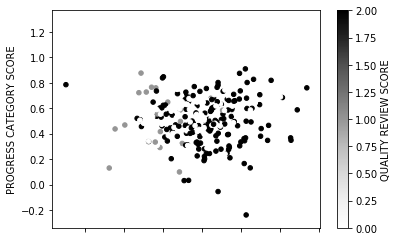

In [37]:
clus_1_data.plot.scatter(x='PERFORMANCE CATEGORY SCORE', y='PROGRESS CATEGORY SCORE', c='QUALITY REVIEW SCORE')
plt.show()

In [38]:
clus_1_data.groupby('QUALITY REVIEW SCORE').count()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
QUALITY REVIEW SCORE,,,,,,,,,,,,
0,231,231,231,231,231,231,231,231,231,231,231,231
1,20,20,20,20,20,20,20,20,20,20,20,20
2,163,163,163,163,163,163,163,163,163,163,163,163


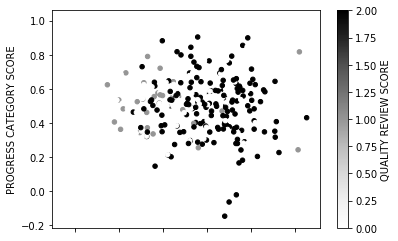

In [39]:
clus_0_data.plot.scatter(x='PERFORMANCE CATEGORY SCORE', y='PROGRESS CATEGORY SCORE', c='QUALITY REVIEW SCORE')
plt.show()

In [40]:
clus_0_data.groupby('QUALITY REVIEW SCORE').count()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
QUALITY REVIEW SCORE,,,,,,,,,,,,
0,222,222,222,222,222,222,222,222,222,222,222,222
1,29,29,29,29,29,29,29,29,29,29,29,29
2,159,159,159,159,159,159,159,159,159,159,159,159


In [41]:
#clus_1_data

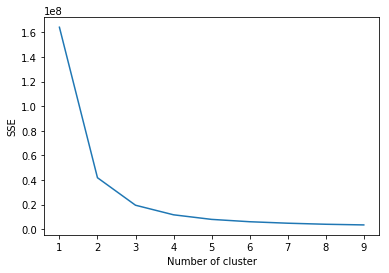

In [42]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df3)
    #cluster_map2["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

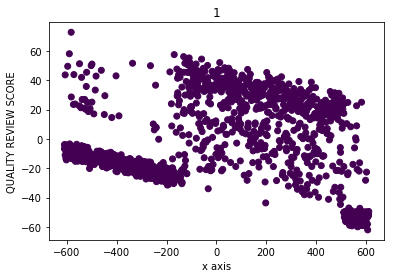

<Figure size 432x288 with 0 Axes>

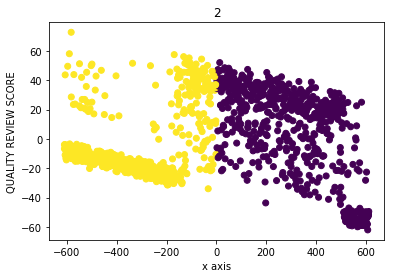

<Figure size 432x288 with 0 Axes>

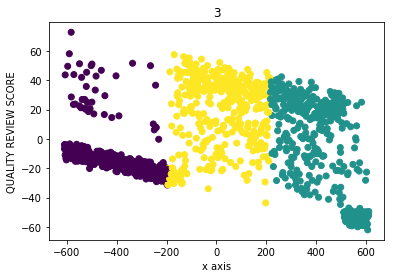

<Figure size 432x288 with 0 Axes>

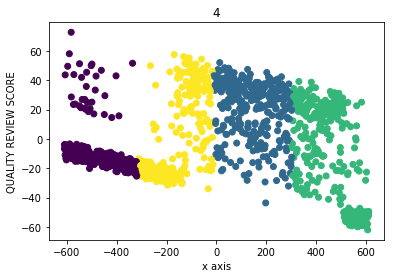

<Figure size 432x288 with 0 Axes>

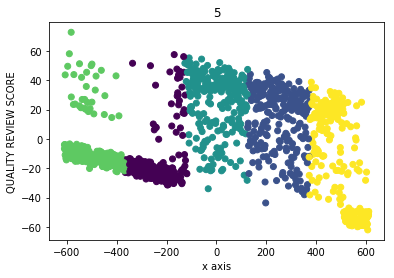

<Figure size 432x288 with 0 Axes>

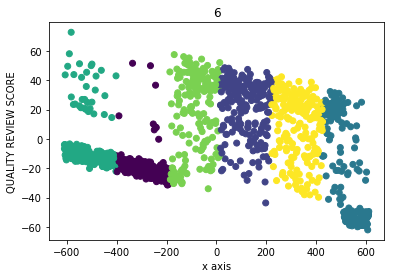

<Figure size 432x288 with 0 Axes>

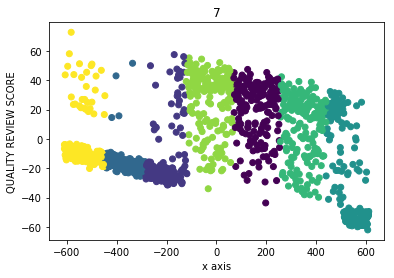

<Figure size 432x288 with 0 Axes>

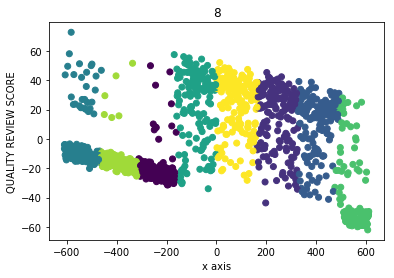

<Figure size 432x288 with 0 Axes>

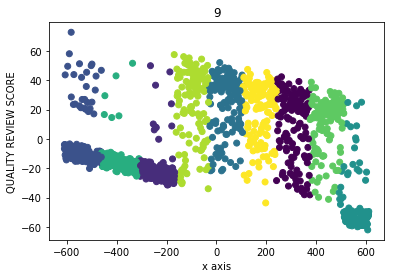

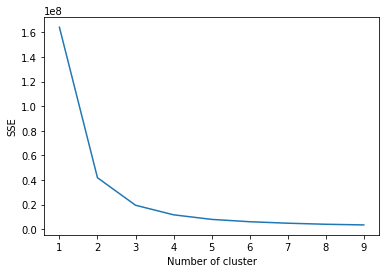

In [43]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df4)
    #cluster_map2["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure(k)
    plt.scatter(pca_c[:,0], pca_c[:,1], c=kmeans.labels_)
    plt.xlabel('x axis')
    plt.ylabel('QUALITY REVIEW SCORE')
    plt.title(k)
    plt.show()
    plt.figure()
    
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [44]:
#silhouette analysis

In [45]:
from __future__ import print_function
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools



from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = df4
y = dfy


In [46]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.6132391844166517


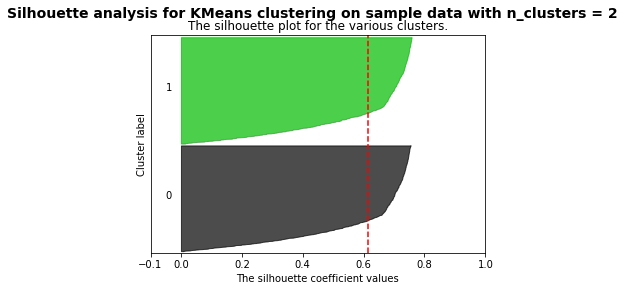

For n_clusters = 3 The average silhouette_score is : 0.5615864106659038


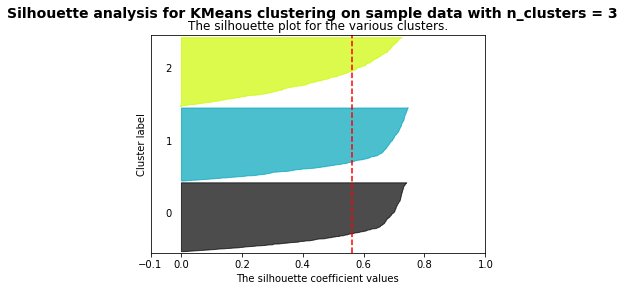

For n_clusters = 4 The average silhouette_score is : 0.524662882141797


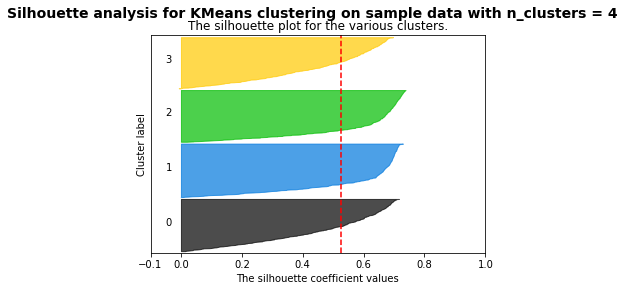

For n_clusters = 5 The average silhouette_score is : 0.49941599548879706


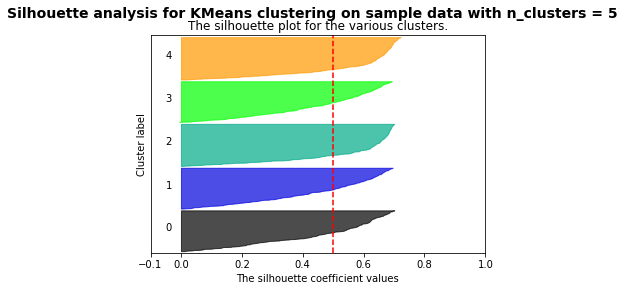

For n_clusters = 6 The average silhouette_score is : 0.470778030999542


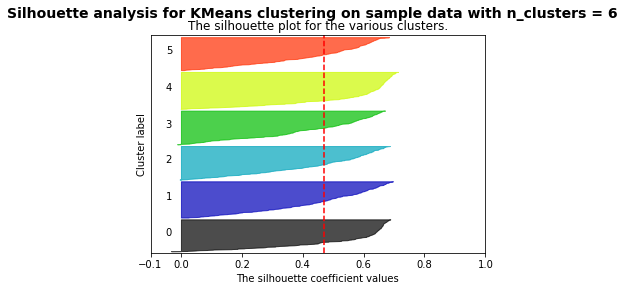

In [47]:
figures = []
#cmap = cm.get_cmap("Spectral")
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #plt.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    plt.xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [48]:
#splitting the dataset for ensemble

In [49]:
train = df3.sample(frac=0.75, random_state=99)
test = df3.loc[~df3.index.isin(train.index), :]

In [50]:
train.reset_index(drop=True)

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE
0,10,243,21,0,3,3.030000,3,38.640000,0.510000,0.49800,0.251000,2.250000,0
1,84,351,13,0,3,3.360000,0,106.630000,1.048000,0.96400,1.046000,4.500000,0
2,19,210,60,0,3,3.140000,1,55.530000,0.619000,0.67700,0.417000,3.000000,0
3,2,993,54,0,0,30.200000,0,65.200000,0.951000,0.39200,0.603000,6.000000,2
4,25,866,40,0,0,42.630000,1,55.630000,0.570000,0.69200,0.451000,1.500000,2
5,28,835,47,0,0,66.780000,1,62.430000,0.423000,0.42300,0.748000,2.250000,0
6,4,980,54,0,0,79.630000,3,37.380000,0.325000,0.47000,0.335000,0.000000,0
7,30,769,24,0,0,75.630000,1,53.500000,0.428000,0.20900,0.687000,3.000000,0
8,15,98,7,1,1,2.410000,3,32.720000,0.208000,0.43800,0.299000,0.000000,0
9,12,951,68,0,0,75.420000,2,48.370000,0.418000,0.51800,0.442000,2.250000,0


In [51]:
test.shape

(316, 13)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 400 to 1146
Data columns (total 13 columns):
DISTRICT                               946 non-null int64
SCHOOL                                 946 non-null int16
SCHOOL SUPPORT ORGANIZATION/NETWORK    946 non-null int8
PROGRESS REPORT TYPE                   946 non-null int8
SCHOOL LEVEL*                          946 non-null int8
PEER INDEX                             946 non-null float64
GRADE                                  946 non-null int8
OVERALL SCORE                          946 non-null float64
ENVIRONMENT CATEGORY SCORE             946 non-null float64
PERFORMANCE CATEGORY SCORE             946 non-null float64
PROGRESS CATEGORY SCORE                946 non-null float64
ADDITIONAL CREDIT                      946 non-null float64
QUALITY REVIEW SCORE                   946 non-null int8
dtypes: float64(6), int16(1), int64(1), int8(5)
memory usage: 65.6 KB


In [53]:
df3.shape

(1262, 13)

In [54]:
#test

In [55]:
#train

In [56]:
#partitioning train set into clusters

In [57]:
train_y = train['QUALITY REVIEW SCORE']
train_df = train.drop('QUALITY REVIEW SCORE',axis=1)
km1 = KMeans(n_clusters=3).fit(train_df)

In [80]:
#km1.labels_

In [59]:
cluster_map = pd.DataFrame()
newdatamod = pd.DataFrame()
cluster_map['data_index'] = train.index.values
cluster_map['cluster'] = km1.labels_

In [60]:
clus_1 = train.loc[cluster_map[cluster_map['cluster']==1]['data_index']]


In [61]:
clus_0 = train.loc[cluster_map[cluster_map['cluster']==0]['data_index']]

In [62]:
clus_2 = train.loc[cluster_map[cluster_map['cluster']==2]['data_index']]

In [64]:
clus_2.groupby('QUALITY REVIEW SCORE').count()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
QUALITY REVIEW SCORE,,,,,,,,,,,,
0,167,167,167,167,167,167,167,167,167,167,167,167
1,24,24,24,24,24,24,24,24,24,24,24,24
2,118,118,118,118,118,118,118,118,118,118,118,118


In [66]:
clus_1.groupby('QUALITY REVIEW SCORE').count()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
QUALITY REVIEW SCORE,,,,,,,,,,,,
0,207,207,207,207,207,207,207,207,207,207,207,207
1,37,37,37,37,37,37,37,37,37,37,37,37
2,91,91,91,91,91,91,91,91,91,91,91,91


In [68]:
clus_0.groupby('QUALITY REVIEW SCORE').count()

,DISTRICT,SCHOOL,SCHOOL SUPPORT ORGANIZATION/NETWORK,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT
QUALITY REVIEW SCORE,,,,,,,,,,,,
0,163,163,163,163,163,163,163,163,163,163,163,163
1,16,16,16,16,16,16,16,16,16,16,16,16
2,123,123,123,123,123,123,123,123,123,123,123,123


In [69]:
clus_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 57 to 957
Data columns (total 13 columns):
DISTRICT                               302 non-null int64
SCHOOL                                 302 non-null int16
SCHOOL SUPPORT ORGANIZATION/NETWORK    302 non-null int8
PROGRESS REPORT TYPE                   302 non-null int8
SCHOOL LEVEL*                          302 non-null int8
PEER INDEX                             302 non-null float64
GRADE                                  302 non-null int8
OVERALL SCORE                          302 non-null float64
ENVIRONMENT CATEGORY SCORE             302 non-null float64
PERFORMANCE CATEGORY SCORE             302 non-null float64
PROGRESS CATEGORY SCORE                302 non-null float64
ADDITIONAL CREDIT                      302 non-null float64
QUALITY REVIEW SCORE                   302 non-null int8
dtypes: float64(6), int16(1), int64(1), int8(5)
memory usage: 20.9 KB


In [70]:
clus0_y = clus_0['QUALITY REVIEW SCORE']
clus0_x = clus_0.drop('QUALITY REVIEW SCORE',1)

clus1_y = clus_1['QUALITY REVIEW SCORE']
clus1_x = clus_1.drop('QUALITY REVIEW SCORE',1)

clus2_y = clus_2['QUALITY REVIEW SCORE']
clus2_x = clus_2.drop('QUALITY REVIEW SCORE',1)

test_y = test['QUALITY REVIEW SCORE']
test_x = test.drop('QUALITY REVIEW SCORE',1)

In [72]:
lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')
dt = DecisionTreeClassifier()

knn = KNeighborsClassifier()

lr.fit(clus0_x, clus0_y)
dt.fit(clus1_x, clus1_y)
knn.fit(clus2_x, clus2_y)

lr_pred = lr.predict(test_x)
dt_pred = dt.predict(test_x)
knn_pred = knn.predict(test_x)

In [77]:
#lr_pred

In [78]:
#dt_pred

In [79]:
#knn_pred

In [74]:
lr_pred = pd.DataFrame(lr_pred)
dt_pred = pd.DataFrame(dt_pred)
knn_pred = pd.DataFrame(knn_pred)
pred = pd.concat([lr_pred, dt_pred, knn_pred], axis=1)
pred.columns = ['logistic','decision tree','KNN']


In [75]:
pred

,logistic,decision tree,KNN
0,2,2,0
1,2,1,0
2,2,2,0
3,2,0,0
4,0,1,0
5,2,2,2
6,2,2,0
7,0,1,0
8,2,2,2
9,0,2,2


In [ ]:
#ensemble using sklearn
#X_train, X_test, y_train, y_test

In [32]:
lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log = BaggingClassifier(base_estimator=lr,random_state=1)
log.fit(X_train,y_train)
pred = log.predict(X_test)
accuracy_score(y_test,pred)*100

56.916996047430835

In [34]:
knn = KNeighborsClassifier()
kn = BaggingClassifier(base_estimator=knn,random_state=1)
kn.fit(X_train,y_train)
pred = kn.predict(X_test)
accuracy_score(y_test,pred)*100

52.569169960474305

In [36]:
dt = DecisionTreeClassifier()
kn = BaggingClassifier(base_estimator=dt,random_state=1)
kn.fit(X_train,y_train)
pred = kn.predict(X_test)
accuracy_score(y_test,pred)*100

58.10276679841897

In [37]:
dt = RandomForestClassifier()
kn = BaggingClassifier(base_estimator=dt,random_state=1)
kn.fit(X_train,y_train)
pred = kn.predict(X_test)
accuracy_score(y_test,pred)*100

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

64.03162055335969